In [1]:
import requests
from bs4 import BeautifulSoup
from csv import writer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
fd = open("List of All Stock Ticker Symbols _ Stock Analysis.html", "rb")
soup = BeautifulSoup(fd)
fd.close()

In [3]:
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 1 


In [4]:
data_table = soup.find("table", {"class":'svelte-v47wb2'})

In [5]:
# fetching headers
headers = [ th.text for th in data_table.thead.tr.findAll('th')]
headers

['Symbol', 'Company Name', 'Industry', 'Market Cap']

In [6]:
# fetching rows
rows=data_table.tbody.findAll('tr')
all_rows=[]
for tr in rows:
    row_data=[]
    for td in tr.findAll('td'):
        row_data.append(td.text)
    if row_data:
        all_rows.append(row_data)
all_rows

[['A', 'Agilent Technologies', 'Life Sciences Tools & Services', '35.50B'],
 ['AA', 'Alcoa', 'Metals & Mining', '7.94B'],
 ['AAC', 'Ares Acquisition', 'Blank Check / SPAC', '1.23B'],
 ['AACG', 'ATA Creativity Global', 'Diversified Consumer Services', '40.44M'],
 ['AACI', 'Armada Acquisition I', 'Blank Check / SPAC', '204.72M'],
 ['AADI', 'Aadi Bioscience', 'Biotechnology', '269.31M'],
 ['AAIC',
  'Arlington Asset Investment',
  'Mortgage Real Estate Investment Trust...',
  '91.36M'],
 ['AAL', 'American Airlines Group', 'Airlines', '9.40B'],
 ['AAMC',
  'Altisource Asset Management',
  'Real Estate Management & Development',
  '21.93M'],
 ['AAME', 'Atlantic American', 'Insurance', '54.48M'],
 ['AAN', "The Aaron's Company", 'Specialty Retail', '450.50M'],
 ['AAOI', 'Applied Optoelectronics', 'Communications Equipment', '45.04M'],
 ['AAON', 'AAON, Inc.', 'Building Products', '2.86B'],
 ['AAP', 'Advance Auto Parts', 'Specialty Retail', '11.44B'],
 ['AAPL', 'Apple', 'Technology Hardware, St

In [7]:
df = pd.DataFrame(all_rows, columns=headers)
df.head()

,Symbol,Company Name,Industry,Market Cap
0,A,Agilent Technologies,Life Sciences Tools & Services,35.50B
1,AA,Alcoa,Metals & Mining,7.94B
2,AAC,Ares Acquisition,Blank Check / SPAC,1.23B
3,AACG,ATA Creativity Global,Diversified Consumer Services,40.44M
4,AACI,Armada Acquisition I,Blank Check / SPAC,204.72M


In [8]:
len(df)

6249

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Symbol        6249 non-null   object
 1   Company Name  6249 non-null   object
 2   Industry      6249 non-null   object
 3   Market Cap    6249 non-null   object
dtypes: object(4)
memory usage: 195.4+ KB


### Step1: Replacing white spaces in headers with underscore

In [10]:
df.columns = df.columns.str.replace(' ','_')
df

,Symbol,Company_Name,Industry,Market_Cap
0,A,Agilent Technologies,Life Sciences Tools & Services,35.50B
1,AA,Alcoa,Metals & Mining,7.94B
2,AAC,Ares Acquisition,Blank Check / SPAC,1.23B
3,AACG,ATA Creativity Global,Diversified Consumer Services,40.44M
4,AACI,Armada Acquisition I,Blank Check / SPAC,204.72M
...,...,...,...,...
6244,ZWS,Zurn Water Solutions,Pollution & Treatment Controls,5.14B
6245,ZY,Zymergen,Specialty Chemicals,203.19M
6246,ZYME,Zymeworks,Biotechnology,339.12M
6247,ZYNE,Zynerba Pharmaceuticals,Pharmaceuticals,49.70M


### Step2: Check for Missing values

In [11]:
df.isna().sum()

Symbol          0
Company_Name    0
Industry        0
Market_Cap      0
dtype: int64

### Step3: Check for duplicates

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(6249, 4)

### Step4: convert the Market_Cap values  to millions

In [14]:
# removing special characters
df['Market_Cap'] = df['Market_Cap'].str.replace(',','')
df['Market_Cap'] = df['Market_Cap'].str.replace('-', '0')

In [15]:
# converting all the values to millions
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'M' in x:
        if len(x) > 0:
            return float(x.replace('M', ''))
    if 'B' in x:
        if len(x) > 0:
            return float(x.replace('B', '')) * 1000
    if 'T' in x:
        return float(x.replace('T', '')) * 1000000
    return 0.0

df['Market_Cap'] = df['Market_Cap'].apply(value_to_float)

In [16]:
# converting float to int
df['Market_Cap'] = df['Market_Cap'].astype(int)
df['Market_Cap'] 

0       35500
1        7940
2        1230
3          40
4         204
        ...  
6244     5140
6245      203
6246      339
6247       49
6248      293
Name: Market_Cap, Length: 6249, dtype: int32

### Step5: Renaming Header

In [17]:
df.rename(columns={"Market_Cap": "Market_Cap_Millions"}, inplace=True)

In [18]:
df

,Symbol,Company_Name,Industry,Market_Cap_Millions
0,A,Agilent Technologies,Life Sciences Tools & Services,35500
1,AA,Alcoa,Metals & Mining,7940
2,AAC,Ares Acquisition,Blank Check / SPAC,1230
3,AACG,ATA Creativity Global,Diversified Consumer Services,40
4,AACI,Armada Acquisition I,Blank Check / SPAC,204
...,...,...,...,...
6244,ZWS,Zurn Water Solutions,Pollution & Treatment Controls,5140
6245,ZY,Zymergen,Specialty Chemicals,203
6246,ZYME,Zymeworks,Biotechnology,339
6247,ZYNE,Zynerba Pharmaceuticals,Pharmaceuticals,49


### Step6: Calculating outliers

In [19]:
df.describe()

,Market_Cap_Millions
count,6.249000e+03
mean,1.774450e+04
std,5.313575e+05
min,0.000000e+00
25%,1.430000e+02
50%,5.320000e+02
75%,2.970000e+03
max,2.957000e+07


<AxesSubplot:xlabel='Market_Cap_Millions'>

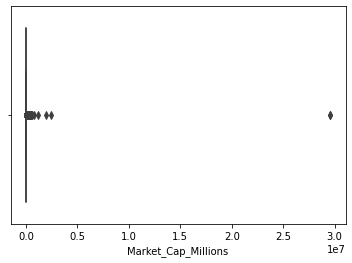

In [20]:
sns.boxplot(x=df['Market_Cap_Millions'])

### Step7: Removing the outliers

In [21]:
# Checking for outlier rows 
df1 = df[np.abs(stats.zscore(df["Market_Cap_Millions"])) > 3]
df1

,Symbol,Company_Name,Industry,Market_Cap_Millions
14,AAPL,Apple,"Technology Hardware, Storage & Periph...",2430530
2477,GOOG,Alphabet,Interactive Media & Services,29570000
2478,GOOGL,Alphabet,Interactive Media & Services,29570000
3739,MSFT,Microsoft,Software,1920020


In [22]:
# Google Market Cap seems to be incorrect. So, replacing it with the correct value.
df['Market_Cap_Millions'] = df['Market_Cap_Millions'].replace(29570000, 1480000)

<AxesSubplot:xlabel='Market_Cap_Millions'>

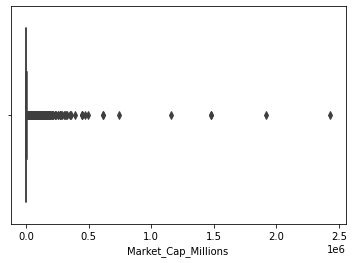

In [23]:
# After fixing the outlier, plotting the graph
sns.boxplot(x=df['Market_Cap_Millions'])